# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD

**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - https://namjulee.github.io/njs-lab-public/ 

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

##### AI / ML for designers, Computational Design Class
### Smart Drawing: Vector and Raster data
NJ Namju Lee / nj.namju@gmail.com

# 04 SmartDrawing Pre-Processing Training Multi Classification

### [Colab version](https://colab.research.google.com/drive/1LOP36_Z46P4rJ5D2D5lE4P1OMDgOzMUJ#scrollTo=X2XXbVGI4Zwf)

In [1]:
import sys
import os

import numpy as np
import pandas as pd

print('----------------------------')
print('numpy:', np.__version__)
print('pandas:', pd.__version__)

import tensorflow as tf
print('tensorflow', tf.__version__)
print('python', sys.version)
print('----------------------------')
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
print('keras',keras.__version__);

from sklearn.model_selection import train_test_split
import math

import matplotlib.pyplot as plt

----------------------------
numpy: 1.21.5
pandas: 1.5.2
tensorflow 2.6.0
python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
----------------------------
keras 2.6.0


In [2]:
# for google colab
# from google.colab import drive 
# drive.mount('/content/gdrive')
# pathFileName = "gdrive/My Drive/njs-python-core/Workshop/SmartDrawing/data/vector/vectorData.csv"
# # df=pd.read_csv('pathFileName')
# dataSet = np.loadtxt(pathFileName, delimiter=',')

In [3]:
# import prepared data
dataSet = np.loadtxt( 'data/vector/vectorData.csv', delimiter=',')
Y = dataSet[:,-1:]
X = dataSet[:,:-1]
print('dim class: ', Y.shape)
print('dim mat: ', X.shape)

np.random.seed(222)
# np.random.shuffle(dataSet)

dim class:  (530, 1)
dim mat:  (530, 501)


In [4]:
def DataPreProcessing(d, testSize = 0.3):
    Y = d[:,-1:]
    X = d[:,:-1]
    print('dim class: ', Y.shape)
    print('dim mat: ', X.shape)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testSize, random_state=0)
    
    return [X_train, X_test, Y_train, Y_test]

In [5]:
theModelFitHistory = []
theModelStatic = []
def TrainNetwork(X_train, X_test, Y_train, Y_test, epochs=100, networkType = 0, testSize = 0.3, batchSize=15 ,autoStop = False ):

    Y_train = tf.keras.utils.to_categorical(Y_train)
    Y_test = tf.keras.utils.to_categorical(Y_test)
        
    xDim = X_train.shape[1]
    yDim = Y_train.shape[1]
    
    model = Sequential()
    
    MODEL_DIR = './model/modelMultiClassification/'
    if not os.path.exists(MODEL_DIR):
        os.mkdir(MODEL_DIR)

    modelpath="./model/modelMultiClassification/Network_"+str(networkType)+"_{epoch:02d}-{val_loss:.4f}.hdf5"
    checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
    
    if networkType == 0:
        model.add(Dense(30, input_dim=xDim, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))
    
    elif networkType == 1:  
        model.add(Dense(30,  input_dim=xDim, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))
 
    elif networkType == 2: 
        model.add(Dense(64,  input_dim=xDim, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))
    
    elif networkType == 3: 
        model.add(Dense(64,  input_dim=xDim, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))
    
    elif networkType == 4: 
        model.add(Dense(128,  input_dim=xDim, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))
    
    elif networkType == 5: 
        model.add(Dense(128,  input_dim=xDim, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(yDim, activation='softmax'))

                        # binary_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
    if autoStop:
        modelFitHistory = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                                    epochs=epochs, batch_size=batchSize, verbose=0, 
                                    callbacks=[early_stopping_callback,checkpointer])
    else:
        modelFitHistory = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                                    epochs=epochs, batch_size=batchSize, verbose=0,)     
        
    theModelFitHistory.append(modelFitHistory);
    
    print('-----------------------')
    print('network:', networkType)
    print('done for fitting')
    
    theModelStatic.append(model)
    
    # tfjs.converters.save_keras_model(model, tfjs_target_dir)
    # Y_prediction = model.predict(X_test).flatten()

    # Y_prediction = model.predict(X_test)
    # print(Y_prediction);
    # print(Y_test)
    
    # Y_prediction = model.evaluate(X_test, Y_test)
    # print(Y_prediction)

    score = model.evaluate(X_test, Y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    return score

In [6]:
print(dataSet[0][0])

1.0


In [7]:
import time

theModelFitHistory = []
theModelStatic = []

epochs = 100
numNetwork = 6
resultArrayOfArray = []

resultArray = []
dataForTrain = DataPreProcessing(dataSet, testSize = 0.15)

for i in range(numNetwork):
    start = time.time()
    yPredictionSet = TrainNetwork(
        dataForTrain[0],dataForTrain[1],dataForTrain[2],dataForTrain[3],
        epochs=epochs, networkType=i, 
        batchSize=50, autoStop = True
        )
    resultArray.append(yPredictionSet)
    end = time.time()
    print("time ", end - start)
resultArrayOfArray.append(resultArray)
print('============================================')

dim class:  (530, 1)
dim mat:  (530, 501)

Epoch 00001: val_loss improved from inf to 2.10823, saving model to ./model/modelMultiClassification\Network_0_01-2.1082.hdf5

Epoch 00002: val_loss improved from 2.10823 to 1.94199, saving model to ./model/modelMultiClassification\Network_0_02-1.9420.hdf5

Epoch 00003: val_loss improved from 1.94199 to 1.74440, saving model to ./model/modelMultiClassification\Network_0_03-1.7444.hdf5

Epoch 00004: val_loss improved from 1.74440 to 1.59876, saving model to ./model/modelMultiClassification\Network_0_04-1.5988.hdf5

Epoch 00005: val_loss improved from 1.59876 to 1.46727, saving model to ./model/modelMultiClassification\Network_0_05-1.4673.hdf5

Epoch 00006: val_loss improved from 1.46727 to 1.38090, saving model to ./model/modelMultiClassification\Network_0_06-1.3809.hdf5

Epoch 00007: val_loss improved from 1.38090 to 1.27486, saving model to ./model/modelMultiClassification\Network_0_07-1.2749.hdf5

Epoch 00008: val_loss improved from 1.27486 

In [8]:
theModelStatic

network: 0


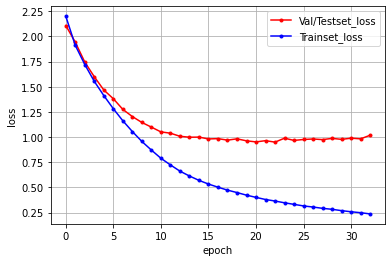

network: 1


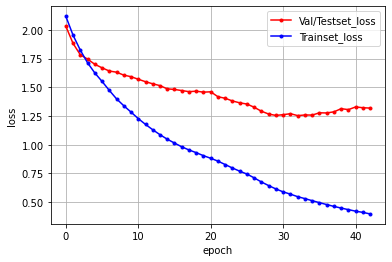

network: 2


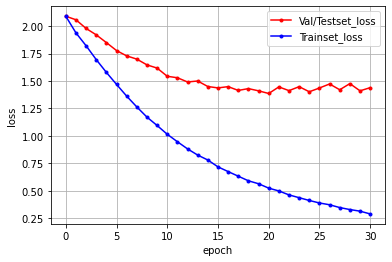

network: 3


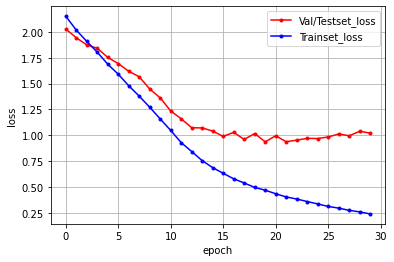

network: 4


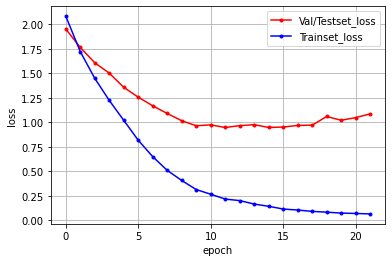

network: 5


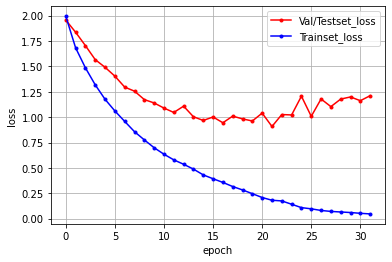

In [9]:

for i in range(len( theModelFitHistory)):
    history = theModelFitHistory[i]
    y_vloss = history.history['val_loss'] # test loss
    y_loss = history.history['loss'] # train loss

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c="red", label='Val/Testset_loss')
    plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

    print('network:',i)
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [10]:
# # for google colab
# from google.colab import drive 
# drive.mount('/content/gdrive')
# pathFileName = "gdrive/My Drive/njs-python-core/workshopPublic/SmartDrawing/data/vector/vectorData.csv"
# # df=pd.read_csv('pathFileName')
# dataSet = np.loadtxt(pathFileName, delimiter=',')

In [11]:
# import prepared data
dataSet = np.loadtxt( 'data/vector/vectorData.csv', delimiter=',')
np.random.seed(222)
np.random.shuffle(dataSet)
dataSet.shape

(530, 502)

In [12]:
# print dimension of data(dot product and class)
Y = dataSet[:,-1:]
X = dataSet[:,:-1]
print('dim class: ', Y.shape)
print('dim mat: ', X.shape)

dim class:  (530, 1)
dim mat:  (530, 501)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=30)


Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_val = tf.keras.utils.to_categorical(Y_val)

xDim = X_train.shape[1]
yDim = Y_train.shape[1]

In [14]:
import time

model = Sequential()
model.add(Dense(30, input_dim=xDim, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(yDim, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

start_time = time.time()
hist = model.fit( 
    X_train, Y_train, validation_data=(X_test, Y_test), 
    epochs=100, batch_size=10,
    # verbose=0
    )

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 1.8471 - accuracy: 0.2997 - val_loss: 1.5587 - val_accuracy: 0.4697
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 1.3959 - accuracy: 0.5441 - val_loss: 1.2376 - val_accuracy: 0.5758
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1176 - accuracy: 0.6398 - val_loss: 1.0331 - val_accuracy: 0.7121
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9352 - accuracy: 0.7003 - val_loss: 0.8858 - val_accuracy: 0.8182
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.7967 - accuracy: 0.7884 - val_loss: 0.7810 - val_accuracy: 0.8333
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.8262 - val_loss: 0.7385 - val_accuracy: 0.8333
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.8338 - val_loss: 0.6717 - val_accuracy: 0.8485
Epoch 8/100
4

In [15]:
model.evaluate(X_val, Y_val)

3/3 [==============================] - 0s 2ms/step - loss: 1.1636 - accuracy: 0.7910


[1.163568139076233, 0.7910447716712952]

3/3 [==============================] - 0s 2ms/step - loss: 1.1636 - accuracy: 0.7910


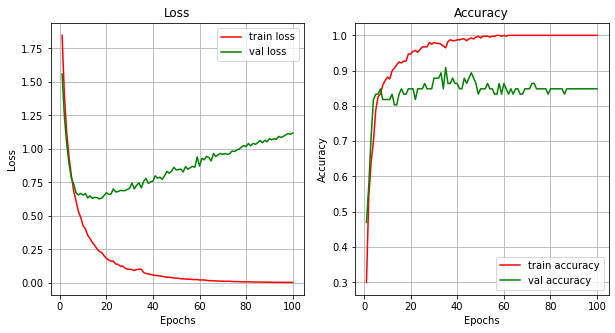

In [16]:
model.evaluate(X_val, Y_val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

3/3 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.8507


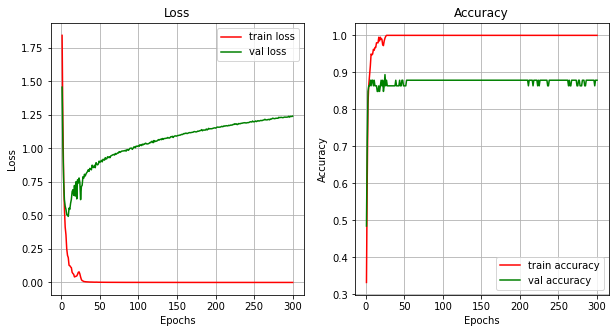

In [17]:
model = Sequential()
model.add(Dense(256, input_dim=xDim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(yDim, activation='softmax'))
# binary_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit( 
    X_train, Y_train, validation_data=(X_test, Y_test), 
    epochs=300, batch_size=32,
    verbose=0
    )
    
model.evaluate(X_train, Y_train)
model.evaluate(X_test, Y_test)
model.evaluate(X_val, Y_val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

3/3 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.8209


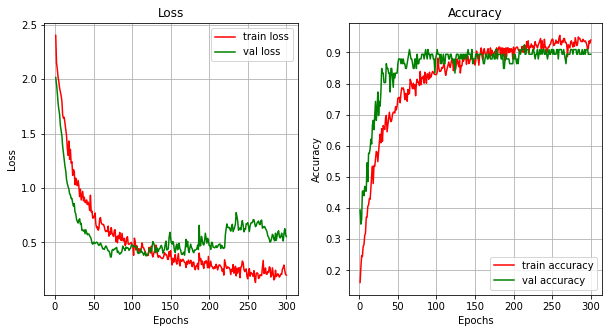

In [18]:
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, input_dim=xDim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dense(yDim, activation='softmax'))
# binary_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit( 
    X_train, Y_train, validation_data=(X_test, Y_test), 
    epochs=300, batch_size=32,
    verbose=0
    )
    
model.evaluate(X_train, Y_train)
model.evaluate(X_test, Y_test)
model.evaluate(X_val, Y_val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

## Implementation

In [19]:
import math
class NVector3:
  x = 0
  y = 0
  z = 0
  def __init__(self, x = 0 , y = 0, z = 0):
    self.x = x
    self.y = y
    self.z = z
  def Noramlized(self):
    len = math.sqrt(self.x * self.x + self.y * self.y + self.z * self.z)

    if len < 0.0000001:
      return NVector3(self.x, self.y, self.z);
    
    self.x /= len
    self.y /= len
    self.z /= len

    return NVector3(self.x, self.y, self.z);

def DotProduct(v1, v2):
  return v1.x * v2.x + v1.y * v2.y + v1.z * v2.z;

def ComputeDotProducts(vs):
  out = []
  for i in range(len(vs)):
    if i < len(vs) - 1:
      v0 = NVector3(vs[i]['x'], vs[i]['y'], 0);
      v1 = NVector3(vs[i + 1]['x'], vs[i + 1]['y'], 0);

      v1.x -= v0.x;
      v1.y -= v0.y;
      v1.z -= v0.z;

      dot = DotProduct(NVector3(1, 0, 0), v1.Noramlized());
      out.append(dot);
    else:
      v0 = NVector3(vs[i]['x'], vs[i]['y'], 0);
      v1 = NVector3(vs[0]['x'], vs[0]['y'], 0);

      v1.x -= v0.x;
      v1.y -= v0.y;
      v1.z -= v0.z;

      dot = DotProduct(NVector3(1, 0, 0), v1.Noramlized());
      out.append(dot);
  return out;
def LinearInterpolate(before, after, atPoint):
  return before + (after - before) * atPoint;

def GetInterpolatedArray(data, fitCount):
  newData = [];
  springFactor = (len(data) - 1) / (fitCount - 1);
  newData.append(data[0]);
  for i in range(fitCount-1):
    tmp = i * springFactor;
    before = +(math.floor(tmp));
    after = +(math.ceil(tmp));
    atPoint = tmp - before;
    newData.append(LinearInterpolate(data[before], data[after], atPoint));
  newData[fitCount - 1] = data[len(data) - 1];
  return newData;

In [20]:

# from IPython.display import HTML, Image
# from google.colab.output import eval_js
# from base64 import b64decode

# canvas_html = """
# <canvas width=%d height=%d></canvas>
# <button>Finish</button>
# <script>
# let canvas = document.querySelector('canvas')
# let ctx = canvas.getContext('2d')
# ctx.lineWidth = %d
# ctx.fillStyle = '#ffffff';
# ctx.beginPath();
# ctx.rect(0, 0, ctx.canvas.width, ctx.canvas.height);
# ctx.closePath();
# ctx.fill();

# let button = document.querySelector('button')
# let mouse = {x: 0, y: 0}
# let pos = [];
# let pressed = false;



# canvas.addEventListener('mousemove', function(e) {

#   mouse.x = e.pageX - this.offsetLeft
#   mouse.y = e.pageY - this.offsetTop

#   if (!pressed) { return; }
#   console.log(mouse);
#   pos.push({x: mouse.x, y: mouse.y});
# })
# canvas.onmousedown = ()=>{
#   pressed = true;
#   ctx.beginPath()
#   ctx.moveTo(mouse.x, mouse.y)
#   canvas.addEventListener('mousemove', onPaint)
# }
# canvas.onmouseup = ()=>{
#   pressed = false;
#   canvas.removeEventListener('mousemove', onPaint)
# }
# let onPaint = ()=>{
#   ctx.lineTo(mouse.x, mouse.y)
#   ctx.stroke()
# }
# let data = new Promise(resolve=>{
#   button.onclick = ()=>{
#     resolve(canvas.toDataURL('image/png'))
#   }
# })
# </script>
# """


# def draw(filename='drawing.png', w=400, h=200, line_width=4):
#   display(HTML(canvas_html % (w, h, line_width)))
#   data = eval_js("data")

#   dataFromCanvas = eval_js("pos")

#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   print('done!! ',len(binary))
#   return eval_js("pos")


In [21]:
# dataFromCanvas = draw()

# data = dataFromCanvas
# # for i in range(len(data)):
#   # print (i)
#   # print(data[i]['x'], data[i]['y'])

# dotList = ComputeDotProducts(data);
# dotListReMap = GetInterpolatedArray(dotList, 501)

# print(len(dotListReMap))
# theDotList = np.matrix(dotListReMap)

# resultClass = {
#    0: "circle",
#    1: "try-gon",
#    2: "arrow",
#    3: "arrowDouble",
#    4: "rect",
#    5: "text",
#    6: "curve",
#    7: "heart",
#    8: "cloud",
# }

# result = model.predict(theDotList);
# print(result)
# print(model.name, resultClass[np.argmax(result)]) 

Link for testing https://namjulee.github.io/njs-lab-public/lab/machine-learning/tf-smart-drawing

In [22]:
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
# !pip install tensorflowjs

In [23]:
import tensorflowjs as tfjs

In [24]:
# path = '../../../../../../Users/namj9345/Desktop/dt-sandbox/public/fake-data/ngraphics/ML/SmartDrawing/modelMultiClassification/'
path = 'model/modeljs'
tfjs.converters.save_keras_model(theModelStatic[5], path)

### [Colab version](https://colab.research.google.com/drive/1LOP36_Z46P4rJ5D2D5lE4P1OMDgOzMUJ#scrollTo=X2XXbVGI4Zwf)